In [331]:
#Rosa Vergara  801073142
import numpy as np
import torch
torch.set_printoptions(edgeitems=2, threshold=50)
import imageio
import os
import matplotlib.pyplot as plt

In [332]:
#Problem1
#creating dataset of multiple images, N × C × H × W tensor
#preallocate tensor of 39 items
batch_size = 39
batch = torch.zeros(batch_size, 3, 255, 255, dtype=torch.uint8)
batch.shape

torch.Size([39, 3, 255, 255])

In [333]:
#Loading images and storing in tensor
files=[]
data_dir = "C:/Users/rosam/OneDrive/Desktop/HW1/pics"
filenames = [name for name in os.listdir(data_dir)
             if os.path.splitext(name)[-1] == '.png']
for i, filename in enumerate(filenames):
    img_arr = imageio.imread(os.path.join(data_dir, filename))
    img_t = torch.from_numpy(img_arr)
    img_t = img_t.permute(2, 0, 1)
    img_t = img_t[:3] # <1>
    batch[i] = img_t
    #to keep track of files
    files.append(filename)

In [335]:
# obtain mean of each image
batch = batch.float()
for i in range(batch_size):
    mean = torch.mean(batch[i])
    print(mean)

tensor(161.5566)
tensor(132.3178)
tensor(202.6205)
tensor(170.1824)
tensor(76.6328)
tensor(134.2616)
tensor(127.4163)
tensor(141.7101)
tensor(86.7520)
tensor(171.6758)
tensor(93.4391)
tensor(143.0506)
tensor(98.7108)
tensor(84.1274)
tensor(133.7916)
tensor(164.2305)
tensor(174.1662)
tensor(111.9910)
tensor(89.1252)
tensor(93.4696)
tensor(86.8112)
tensor(64.1598)
tensor(81.9448)
tensor(85.3398)
tensor(128.1303)
tensor(178.5875)
tensor(158.2791)
tensor(132.4469)
tensor(153.1137)
tensor(94.5509)
tensor(165.5733)
tensor(108.2009)
tensor(114.2423)
tensor(110.1345)
tensor(133.4759)
tensor(103.0813)
tensor(82.7200)
tensor(83.7177)
tensor(65.8454)


In [336]:
# obtain mean of each channel [r,g,b]
n_channels = batch.shape[1]
for c in range(n_channels):
    rgbMean = batch[:, c].mean([1,2])
    print(rgbMean)

tensor([133.9350, 108.5389, 197.6816, 156.6298,  67.5133, 116.5551, 119.5886,
         94.9718,  21.5017, 164.9901,  53.1247, 135.5669, 105.7357,  99.6942,
        149.0656, 153.8866, 167.2527, 131.6544,  79.6885,  76.5688, 103.3524,
         66.4113,  64.7397,  73.9455, 110.6487, 172.8925, 162.1223, 156.7952,
        178.1519, 185.7411, 216.3280, 170.9039, 167.7794, 142.0543, 198.7667,
        155.3505, 209.6044, 132.0610, 152.7710])
tensor([172.4722, 133.1324, 202.8495, 167.9396,  75.7195, 123.3824, 129.1180,
        124.1496,  85.1479, 170.3640,  94.8195, 143.9842, 105.1839, 113.4895,
        182.7171, 197.0157, 205.1427, 143.6363, 133.9632, 132.5773, 115.9471,
         94.4417, 126.6592, 105.5307, 143.1375, 186.6997, 172.2204, 118.6285,
        161.4146,  51.6220, 142.8209,  75.9909, 106.7624, 101.2953, 100.9247,
         78.6582,  17.7315,  80.7935,  23.5847])
tensor([178.2627, 155.2820, 207.3303, 185.9777,  86.6655, 162.8474, 133.5424,
        206.0089, 153.6063, 179.6733, 132.37

In [404]:
#Problem 2
%matplotlib inline
torch.set_printoptions(edgeitems=2, linewidth=75)

In [405]:
#temps in Celsius
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0,
                    3.0, -4.0, 6.0, 13.0, 21.0])
#unknown units
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9,
                    33.9, 21.8, 48.4, 60.4, 68.4])
t_un = 0.1 * t_u

In [415]:
def model(t_u, w1, b, w2):
    return w2 * t_u**2 + w1*t_u + b
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()
#initialize parameters tensor
params = torch.tensor([1.0, 0.0,1.0], requires_grad=True)
params.grad is None

True

In [416]:
loss = loss_fn(model(t_u, *params), t_c)
loss.backward()

params.grad

tensor([3.6181e+05, 5.9642e+03, 2.3149e+07])

In [417]:
if params.grad is not None:
    params.grad.zero_()

In [418]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:  # <1>
            params.grad.zero_()
        
        t_p = model(t_u, *params) 
        loss = loss_fn(t_p, t_c)
        loss.backward()
        
        with torch.no_grad():  # <2>
            params -= learning_rate * params.grad

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params

In [435]:
training_loop(
    n_epochs = 5000, 
    learning_rate = 0.1, 
    params = torch.tensor([1.0, 0.0,1.0], requires_grad=True), # <1> 
    t_u = t_un, # <2> 
    t_c = t_c)

Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan


tensor([nan, nan, nan], requires_grad=True)

In [388]:
training_loop(
    n_epochs = 5000, 
    learning_rate = 0.01, 
    params = torch.tensor([1.0, 0.0,1.0], requires_grad=True), # <1> 
    t_u = t_un, # <2> 
    t_c = t_c)

Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan


tensor([nan, nan, nan], requires_grad=True)

In [399]:
torch.isnan(t_u).any()

tensor(False)

In [403]:
training_loop(
    n_epochs = 5000, 
    learning_rate = 0.001, 
    params = torch.tensor([1.0, 0.0,1.0], requires_grad=True), # <1> 
    t_u = t_un, # <2> 
    t_c = t_c)

Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan


tensor([nan, nan, nan], requires_grad=True)

In [431]:
training_loop(
    n_epochs = 5000, 
    learning_rate = 0.0001, 
    params = torch.tensor([1.0, 0.0,1.0], requires_grad=True), # <1> 
    t_u = t_un, # <2> 
    t_c = t_c)

Epoch 500, Loss 10.708596
Epoch 1000, Loss 8.642083
Epoch 1500, Loss 7.171005
Epoch 2000, Loss 6.123477
Epoch 2500, Loss 5.377227
Epoch 3000, Loss 4.845285
Epoch 3500, Loss 4.465788
Epoch 4000, Loss 4.194724
Epoch 4500, Loss 4.000802
Epoch 5000, Loss 3.861744


tensor([-0.8881, -0.8753,  0.5570], requires_grad=True)

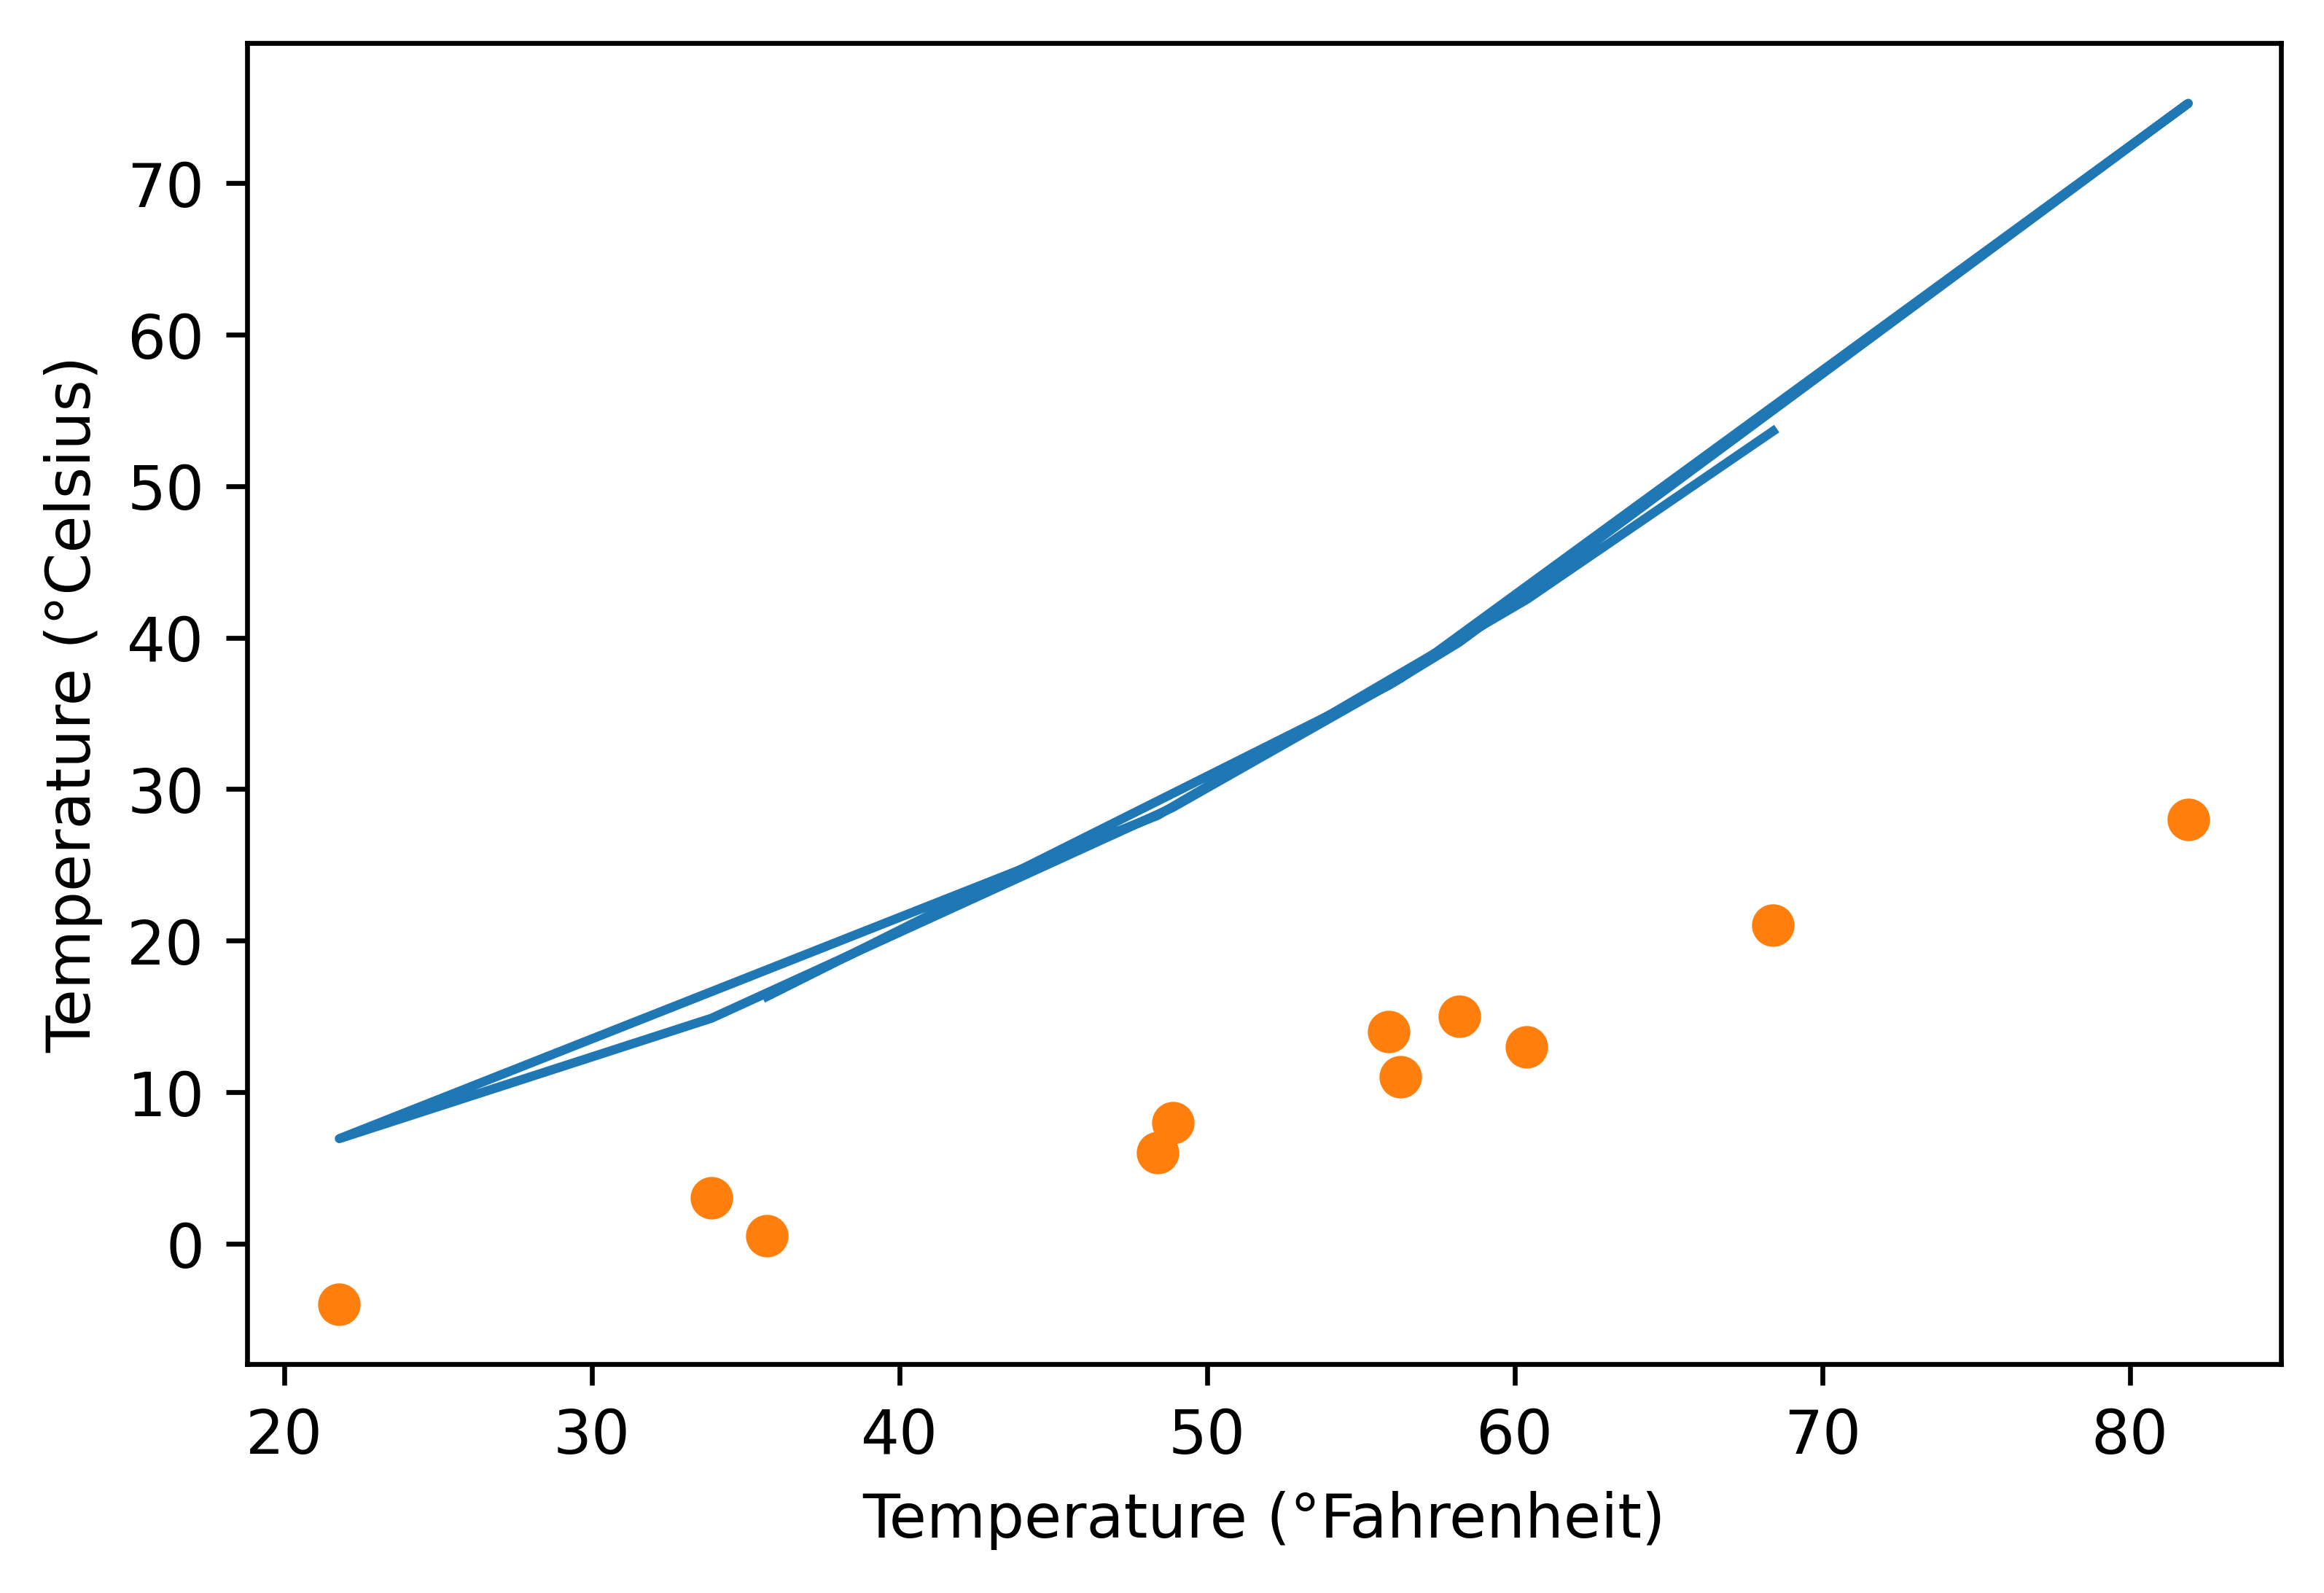

In [432]:
%matplotlib inline
from matplotlib import pyplot as plt

t_p = model(t_un, *params)

fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy()) # <2>
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.savefig("temp_unknown_plot.png", format="png")  # bookskip